In [28]:
from nn.models import ToyClassifier, ToyClassifierPrm, swish_activation

import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

In [29]:
GEN_NON_PRM = 7
GEN_PRM = 7

In [30]:
def weights(theta):
    return (1/(1+np.exp(-theta/2))-0.5)

This is not really clean yet, but arrays are saved as "array([...], dtype=float32)" inside of files. A bit of string replacement is needed to parse the data.

In [31]:
pred_text = ''
with open(f'predictions.txt.{GEN_NON_PRM}', 'r') as pred_file:
    pred_text = pred_file.readlines()

predictions = np.array([ np.array(el.replace(' ','').replace('\n','').replace('dtype=float32', '').replace(',),','').replace(',)','').replace('[','').replace(']','').split(','), dtype=float) for el in ''.join(pred_text).split('array([') if len(el) >= 2 ])

print(predictions)

[[0.6552555  0.01325889]
 [0.6592444  0.02121569]
 [0.6626544  0.03526471]
 [0.66345936 0.05589443]
 [0.6601324  0.08681122]
 [0.6480169  0.13411434]
 [0.63865566 0.19455922]
 [0.62472725 0.26770356]
 [0.5923326  0.3455571 ]
 [0.5537222  0.42816532]
 [0.49684012 0.49580863]
 [0.43102878 0.555892  ]
 [0.34518778 0.5804717 ]
 [0.27206013 0.6173708 ]
 [0.19307809 0.642209  ]
 [0.13133052 0.64267564]
 [0.08845394 0.6633582 ]
 [0.0561984  0.6718296 ]
 [0.03548411 0.6748646 ]
 [0.02131099 0.6636514 ]
 [0.01314472 0.6616694 ]]


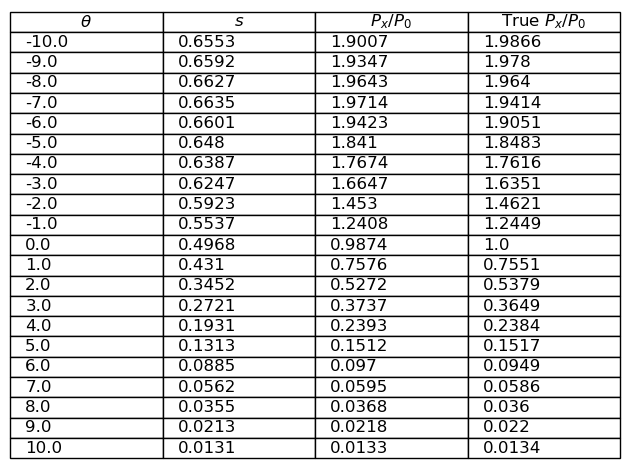

In [32]:
theta_values = np.linspace(-10,10,21)

t_1_1 = theta_values
t_2_1 = predictions.T[0]
t_3_1 = (predictions/(1-predictions)).T[0]
t_4_1 = (0.5-weights(theta_values))/0.5


fig,ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

tab = ax.table(np.round(np.array([t_1_1,t_2_1,t_3_1,t_4_1]),4).transpose(), colLabels=[u'$\\theta$',u'$s$',u'$P_x/P_0$',u'True $P_x/P_0$'], cellLoc='left', loc='center')
tab.auto_set_font_size(False)
tab.set_fontsize(12)

fig.tight_layout()

plt.show()

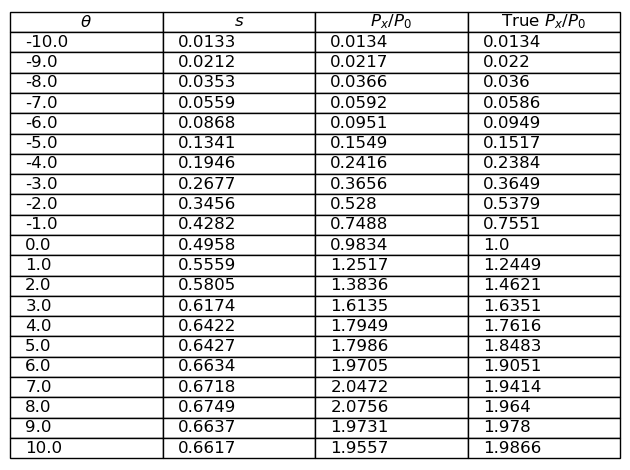

In [33]:
t_1_2 = theta_values
t_2_2 = predictions.T[1]
t_3_2 = (predictions/(1-predictions)).T[1]
t_4_2 = (0.5+weights(theta_values))/0.5


fig,ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

tab = ax.table(np.round(np.array([t_1_2,t_2_2,t_3_2,t_4_2]),4).transpose(), colLabels=[u'$\\theta$',u'$s$',u'$P_x/P_0$',u'True $P_x/P_0$'], cellLoc='left', loc='center')
tab.auto_set_font_size(False)
tab.set_fontsize(12)

fig.tight_layout()

plt.show()

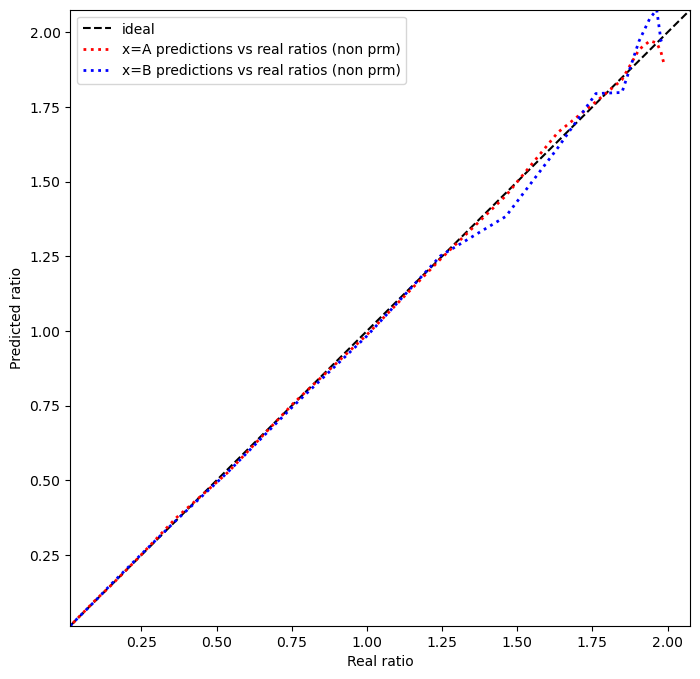

In [34]:
plt.figure(figsize=(8,8))

min_val = np.min(np.array([t_3_1,t_3_2,t_4_1,t_4_2]))
max_val = np.max(np.array([t_3_1,t_3_2,t_4_1,t_4_2]))

lnspc = np.linspace(min_val, max_val, 100)

plt.plot(lnspc, lnspc, 'k', linestyle='--', label='ideal')
plt.plot(t_4_1, t_3_1, marker='', color='r', linestyle=':', linewidth=2, label='x=A predictions vs real ratios (non prm)')
plt.plot(t_4_2, t_3_2, marker='', color='b', linestyle=':', linewidth=2, label='x=B predictions vs real ratios (non prm)')

plt.ylabel('Predicted ratio')
plt.xlabel('Real ratio')
plt.xlim(min_val,max_val)
plt.ylim(min_val,max_val)
plt.legend()

In [35]:
pred_text_prm = ''
with open(f'prm_prediction.txt.{GEN_PRM}', 'r') as pred_file:
    pred_text_prm = pred_file.readlines()

predictions_prm = np.array([ np.array(el.replace(' ','').replace('\n','').replace('dtype=float32', '').replace(',),','').replace(',)','').replace('[','').replace(']','').split(','), dtype=float) for el in ''.join(pred_text_prm).split('array([') if len(el) >= 2 ])

print(predictions_prm)

[[0.6656048  0.01251573]
 [0.6659535  0.0199681 ]
 [0.6651019  0.03213337]
 [0.66291296 0.05155595]
 [0.65931547 0.08191403]
 [0.65353304 0.12694073]
 [0.64341885 0.18936874]
 [0.62606007 0.26801965]
 [0.59918725 0.35534352]
 [0.56050414 0.43957618]
 [0.5063428  0.5105478 ]
 [0.43486142 0.5647518 ]
 [0.35208932 0.60282964]
 [0.2690454  0.62789434]
 [0.19498804 0.6438139 ]
 [0.13464704 0.6538655 ]
 [0.08921415 0.6598959 ]
 [0.05749409 0.6628289 ]
 [0.03661166 0.66364795]
 [0.02317516 0.6635761 ]
 [0.01476875 0.66322315]]


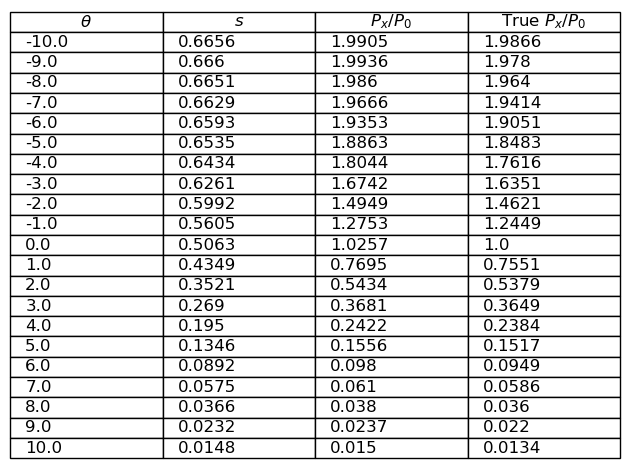

In [36]:
t_1_1 = theta_values
t_2_1 = predictions_prm.T[0]
t_3_1 = (predictions_prm/(1-predictions_prm)).T[0]
t_4_1 = (0.5-weights(theta_values))/0.5


fig,ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

tab = ax.table(np.round(np.array([t_1_1,t_2_1,t_3_1,t_4_1]),4).transpose(), colLabels=[u'$\\theta$',u'$s$',u'$P_x/P_0$',u'True $P_x/P_0$'], cellLoc='left', loc='center')
tab.auto_set_font_size(False)
tab.set_fontsize(12)

fig.tight_layout()

plt.show()

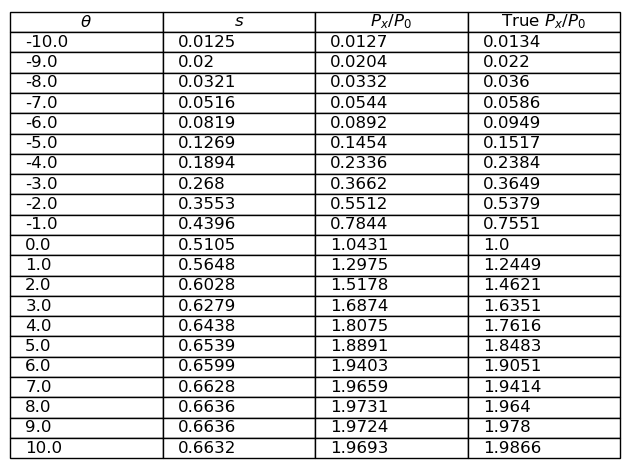

In [37]:
t_1_2 = theta_values
t_2_2 = predictions_prm.T[1]
t_3_2 = (predictions_prm/(1-predictions_prm)).T[1]
t_4_2 = (0.5+weights(theta_values))/0.5


fig,ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

tab = ax.table(np.round(np.array([t_1_2,t_2_2,t_3_2,t_4_2]),4).transpose(), colLabels=[u'$\\theta$',u'$s$',u'$P_x/P_0$',u'True $P_x/P_0$'], cellLoc='left', loc='center')
tab.auto_set_font_size(False)
tab.set_fontsize(12)

fig.tight_layout()

plt.show()

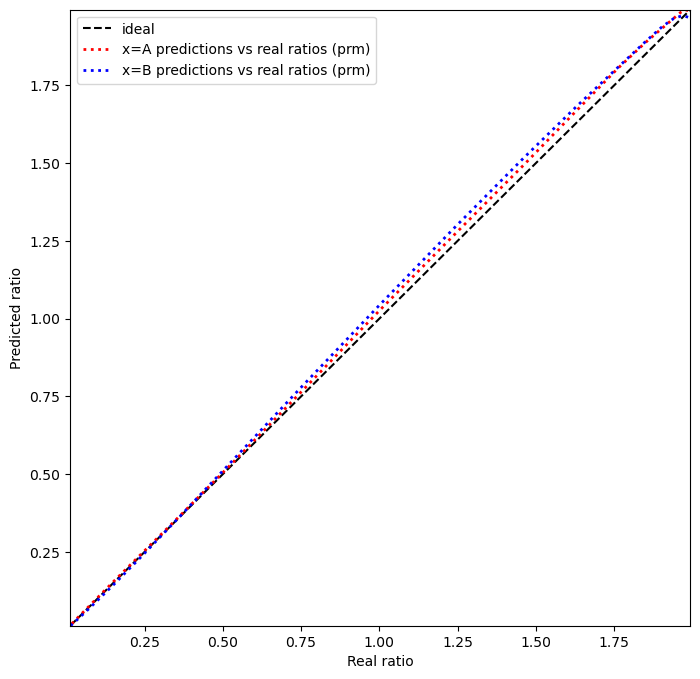

In [38]:
plt.figure(figsize=(8,8))

min_val = np.min(np.array([t_3_1,t_3_2,t_4_1,t_4_2]))
max_val = np.max(np.array([t_3_1,t_3_2,t_4_1,t_4_2]))

lnspc = np.linspace(min_val, max_val, 100)

plt.plot(lnspc, lnspc, 'k', linestyle='--', label='ideal')
plt.plot(t_4_1, t_3_1, marker='', color='r', linestyle=':', linewidth=2, label='x=A predictions vs real ratios (prm)')
plt.plot(t_4_2, t_3_2, marker='', color='b', linestyle=':', linewidth=2, label='x=B predictions vs real ratios (prm)')

plt.ylabel('Predicted ratio')
plt.xlabel('Real ratio')
plt.xlim(min_val,max_val)
plt.ylim(min_val,max_val)
plt.legend()

## Loss per epoch

In [39]:
hist = ''

with open(f'mult_history.txt.{GEN_NON_PRM}', 'r') as hist_file:
    hist = hist_file.readlines()

hist = [ np.array(el.replace('[','').replace(']','').replace(' ','').split(','), dtype=float) for el in hist[0].split('][')]

t_loss = np.array(hist[0::2])
v_loss = np.array(hist[1::2])

epochs = range(1,301)

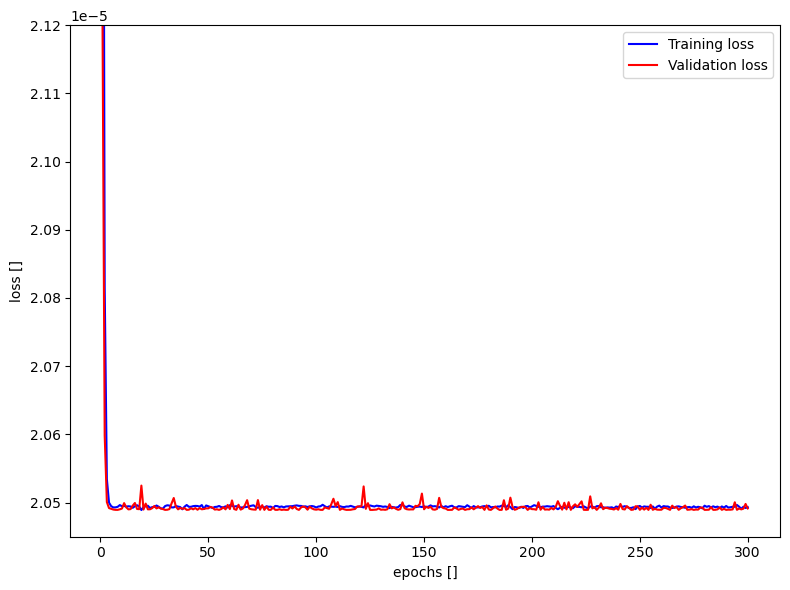

In [71]:
ind = 15

#fig, (ax1,ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [1, 1]}, figsize=(10,8))
fig = plt.figure(figsize=(8,6))

#ax1.set_xticklabels([])

plt.plot(epochs, t_loss[ind], 'b', label='Training loss')
plt.xlabel('epochs []')
plt.ylabel('loss []')
#ax2.legend()

plt.plot(epochs, v_loss[ind], 'r', label='Validation loss')
#ax1.set_ylabel('loss []')

plt.legend()
plt.ylim(2.045e-5,2.12e-5)
fig.tight_layout()

plt.show()

In [41]:
hist_prm = ''

with open(f'prm_history.txt.{GEN_PRM}', 'r') as hist_file:
    hist_prm = hist_file.readlines()

hist_prm = [ np.array(el.replace('[','').replace(']','').replace(' ','').split(','), dtype=float) for el in hist_prm[0].split('][')]

t_loss_prm = np.array(hist_prm[0])
v_loss_prm = np.array(hist_prm[1])

epochs = range(1,301)

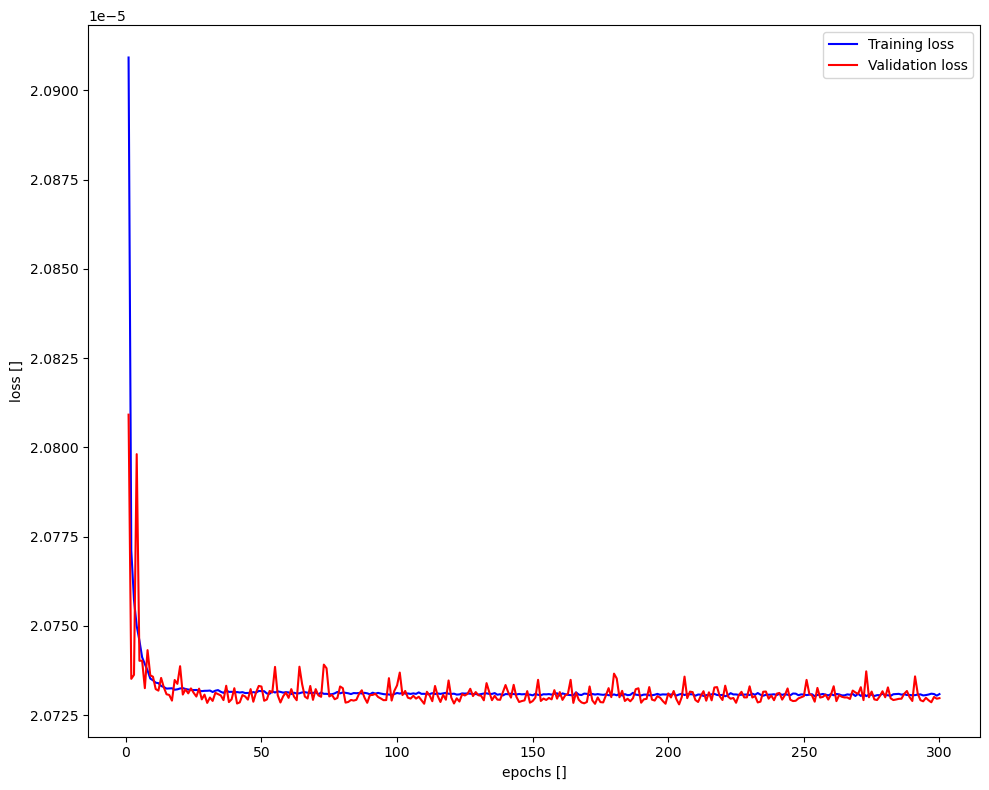

In [42]:
#fig, (ax1,ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [1, 1]}, figsize=(10,8))
fig = plt.figure(figsize=(8,6))

#ax1.set_xticklabels([])

plt.plot(epochs, t_loss_prm, 'b', label='Training loss')
plt.xlabel('epochs []')
plt.ylabel('loss []')
#ax2.legend()

plt.plot(epochs, v_loss_prm, 'r', label='Validation loss')
#ax1.set_ylabel('loss []')
plt.legend()

fig.tight_layout()

plt.show()

## Get best predictions

In [43]:
models = []

for i in range(len(theta_values)):
    model = tf.keras.models.load_model(f'outputs-toy/ckpt/{GEN_NON_PRM}/checkpoint.model_{i+1}.keras', custom_objects={'ToyClassifier': ToyClassifier, 'swish_activation': swish_activation})
    models.append(model)

/u/griesemx/git/bsc-thesis/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
best_pred = []

for model in models:
    pred = model.predict(tf.constant([[0.0],[1.0]]), verbose=0)
    best_pred.append(pred)

best_pred = np.array(best_pred).squeeze(axis=2)

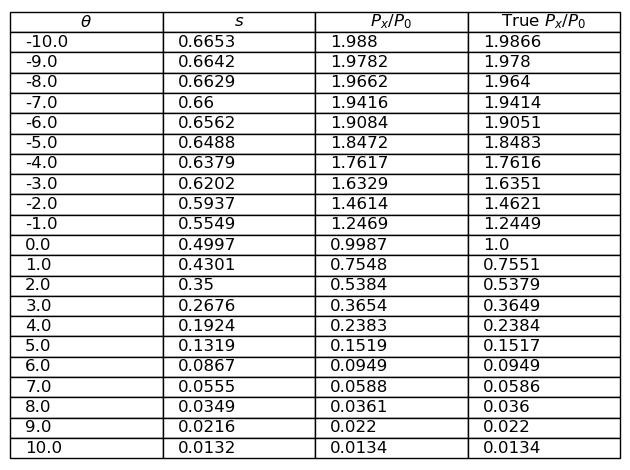

In [45]:
theta_values = np.linspace(-10,10,21)

t_1_1 = theta_values
t_2_1 = best_pred.T[0]
t_3_1 = (best_pred/(1-best_pred)).T[0]
t_4_1 = (0.5-weights(theta_values))/0.5


fig,ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

tab = ax.table(np.round(np.array([t_1_1,t_2_1,t_3_1,t_4_1]),4).transpose(), colLabels=[u'$\\theta$',u'$s$',u'$P_x/P_0$',u'True $P_x/P_0$'], cellLoc='left', loc='center')
tab.auto_set_font_size(False)
tab.set_fontsize(12)

fig.tight_layout()

plt.show()

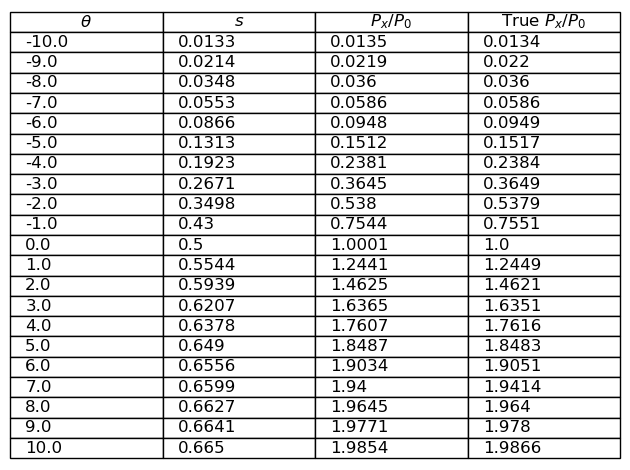

In [46]:
t_1_2 = theta_values
t_2_2 = best_pred.T[1]
t_3_2 = (best_pred/(1-best_pred)).T[1]
t_4_2 = (0.5+weights(theta_values))/0.5


fig,ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

tab = ax.table(np.round(np.array([t_1_2,t_2_2,t_3_2,t_4_2]),4).transpose(), colLabels=[u'$\\theta$',u'$s$',u'$P_x/P_0$',u'True $P_x/P_0$'], cellLoc='left', loc='center')
tab.auto_set_font_size(False)
tab.set_fontsize(12)

fig.tight_layout()

plt.show()

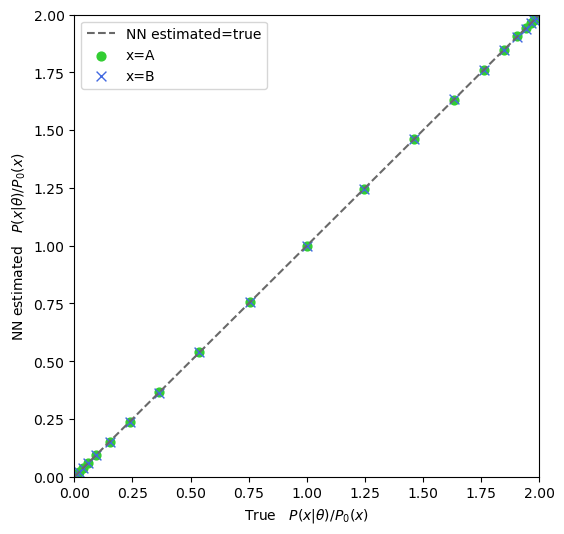

In [72]:
plt.figure(figsize=(6,6))

lnspc = np.linspace(0.0, 2.0, 100)

plt.plot(lnspc, lnspc, color='dimgray', linestyle='--', label='NN estimated=true')
plt.scatter(t_4_1, t_3_1, s=40, color='limegreen', linewidth=1, label='x=A')
plt.scatter(t_4_2, t_3_2, s=50, marker='x', color='royalblue', linewidth=1, label='x=B')

plt.ylabel(u'NN estimated   $P(x|\\theta)/P_0(x)$')
plt.xlabel('True   $P(x|\\theta)/P_0(x)$')
plt.xlim(0.0,2.0)
plt.ylim(0.0,2.0)
plt.legend()

In [48]:
model_prm = tf.keras.models.load_model(f'outputs-toy/ckpt/{GEN_PRM}/checkpoint.model_prm.keras', custom_objects={'ToyClassifierPrm': ToyClassifierPrm, 'swish_activation': swish_activation})

In [49]:
theta_values = np.linspace(-10,10,221)

best_pred_prm = []

for theta in theta_values:
    pred = model_prm.predict(tf.constant([[0.0, theta],[1.0, theta]]), verbose=0)
    best_pred_prm.append(pred)

best_pred_prm = np.array(best_pred_prm).squeeze(2)

In [50]:
t_1_1_prm = theta_values
t_2_1_prm = best_pred_prm.T[0]
t_3_1_prm = (best_pred_prm/(1-best_pred_prm)).T[0]
t_4_1_prm = (0.5-weights(theta_values))/0.5


#fig,ax = plt.subplots()
#fig.patch.set_visible(False)
#ax.axis('off')
#ax.axis('tight')

#tab = ax.table(np.round(np.array([t_1_1,t_2_1,t_3_1,t_4_1]),4).transpose(), colLabels=[u'$\\theta$',u'$s$',u'$P_x/P_0$',u'True $P_x/P_0$'], cellLoc='left', loc='center')
#tab.auto_set_font_size(False)
#tab.set_fontsize(12)

#fig.tight_layout()

#plt.show()

In [51]:
t_1_2_prm = theta_values
t_2_2_prm = best_pred_prm.T[1]
t_3_2_prm = (best_pred_prm/(1-best_pred_prm)).T[1]
t_4_2_prm = (0.5+weights(theta_values))/0.5


#fig,ax = plt.subplots()
#fig.patch.set_visible(False)
#ax.axis('off')
#ax.axis('tight')

#tab = ax.table(np.round(np.array([t_1_2,t_2_2,t_3_2,t_4_2]),4).transpose(), colLabels=[u'$\\theta$',u'$s$',u'$P_x/P_0$',u'True $P_x/P_0$'], cellLoc='left', loc='center')
#tab.auto_set_font_size(False)
#tab.set_fontsize(12)

#fig.tight_layout()

#plt.show()

In [52]:
theta_values = np.linspace(-10,10,21)

best_pred_prm = []

for theta in theta_values:
    pred = model_prm.predict(tf.constant([[0.0, theta],[1.0, theta]]), verbose=0)
    best_pred_prm.append(pred)

best_pred_prm = np.array(best_pred_prm).squeeze(2)

trained_A_ratio = (best_pred_prm/(1-best_pred_prm)).T[0]
trained_B_ratio = (best_pred_prm/(1-best_pred_prm)).T[1]
true_A_ratio = (0.5-weights(theta_values))/0.5
true_B_ratio = (0.5+weights(theta_values))/0.5

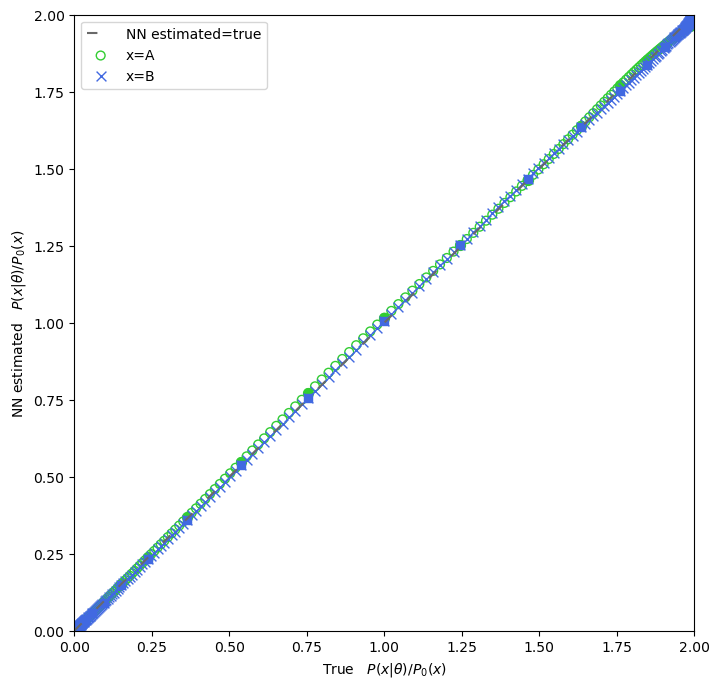

In [62]:
plt.figure(figsize=(8,8))

min_val = np.min(np.array([t_3_1_prm,t_3_2_prm,t_4_1_prm,t_4_2_prm]))
max_val = np.max(np.array([t_3_1_prm,t_3_2_prm,t_4_1_prm,t_4_2_prm]))

lnspc = np.linspace(0.0, 2.0, 100)

plt.plot(lnspc, lnspc, color='dimgray', linestyle=(0,(5,10)), label='NN estimated=true')
plt.scatter(t_4_1_prm, t_3_1_prm, s=40, color='limegreen', facecolors='none', linewidth=1, label='x=A')
plt.scatter(true_A_ratio, trained_A_ratio, s=50, color='limegreen', linewidth=1)
plt.scatter(t_4_2_prm, t_3_2_prm, s=50, marker='x', color='royalblue', linewidth=1, label='x=B')
plt.scatter(true_B_ratio, trained_B_ratio, s=40, marker='s', color='royalblue', linewidth=1)



plt.ylabel(u'NN estimated   $P(x|\\theta)/P_0(x)$')
plt.xlabel('True   $P(x|\\theta)/P_0(x)$')
plt.xlim(0.0,2.0)
plt.ylim(0.0,2.0)
plt.legend()